In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from itertools import combinations, chain
import seaborn as sns

In [3]:
#plt.set_prop_cycle(sns.color_palette("coolwarm_r",num_lines))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette("magma",7))

In [9]:
X = np.random.random((1000))

(array([0.98192024, 0.8817243 , 0.95186146, 1.19233172, 0.95186146,
        1.01197903, 1.07209659, 1.09213578, 0.92180268, 0.96188105]),
 array([0.00142739, 0.10123183, 0.20103627, 0.30084071, 0.40064515,
        0.50044959, 0.60025403, 0.70005847, 0.79986291, 0.89966735,
        0.99947179]),
 <BarContainer object of 10 artists>)

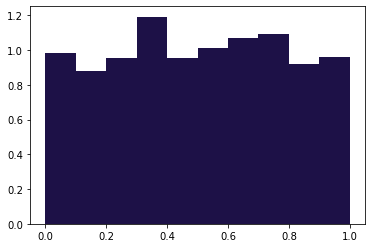

In [10]:
plt.hist(X, density=True)

In [11]:
def GaussianKernel(X,h):
    return 1/(np.sqrt(2*np.pi*h))*np.exp(-(X**2)/(2*h))

In [12]:
x = np.linspace(-1,2,1000)

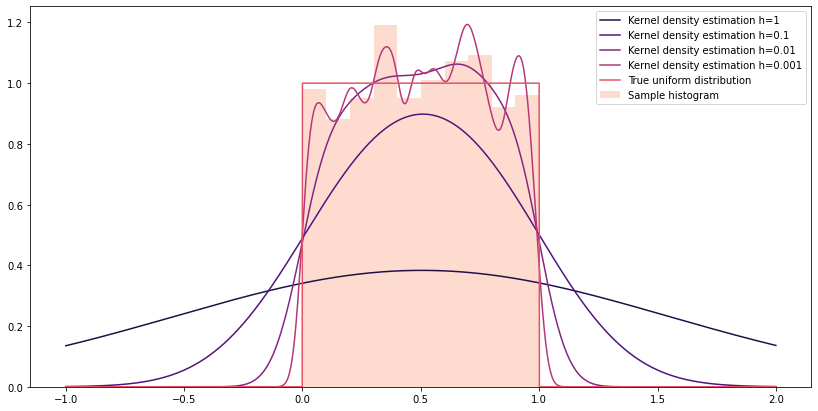

In [13]:
plt.figure(figsize=(14,7)) #figure size

for h in [1,0.1,0.01,0.001]: #for these values of h
    pdf = np.zeros(1000) #calculate approximation
    for x_i in X:
        pdf += GaussianKernel(x-x_i,h)
    plt.plot(x,pdf/1000, label = f'Kernel density estimation h={h}') #plot it
plt.plot([-1,-0.001,0,1,1.001,2],[0,0,1,1,0,0], label='True uniform distribution') #plot true distribution
plt.hist(X, density=True, alpha=0.3, label='Sample histogram') #plot samples histogram
plt.legend()

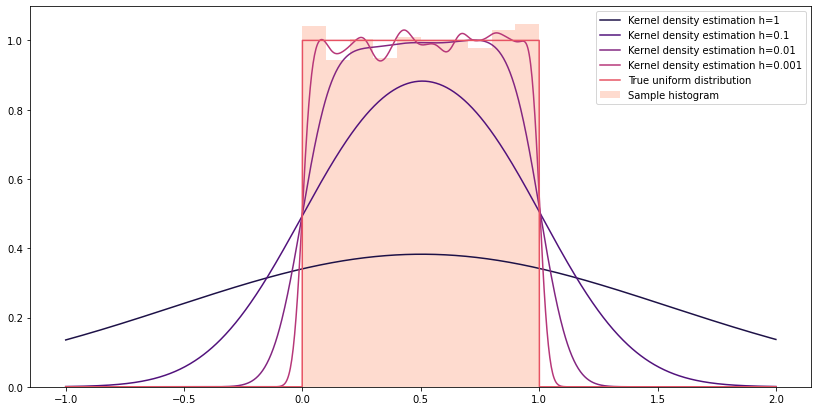

In [14]:
X = np.random.random((10000))
plt.figure(figsize=(14,7))

for h in [1,0.1,0.01,0.001]:
    pdf = np.zeros(1000)
    for x_i in X:
        pdf += GaussianKernel(x-x_i,h)
    plt.plot(x,pdf/10000, label = f'Kernel density estimation h={h}')
plt.plot([-1,-0.001,0,1,1.001,2],[0,0,1,1,0,0], label='True uniform distribution')
plt.hist(X, density=True, alpha=0.3, label='Sample histogram')
plt.legend()

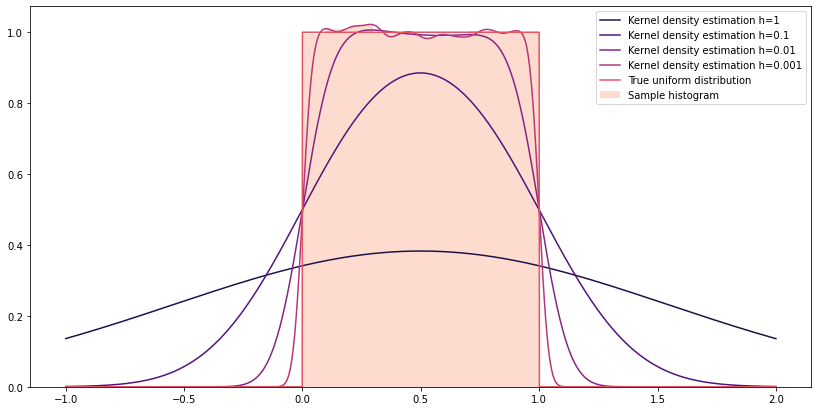

In [15]:
X = np.random.random((100000))
plt.figure(figsize=(14,7))

for h in [1,0.1,0.01,0.001]:
    pdf = np.zeros(1000)
    for x_i in X:
        pdf += GaussianKernel(x-x_i,h)
    plt.plot(x,pdf/100000, label = f'Kernel density estimation h={h}')
plt.plot([-1,-0.001,0,1,1.001,2],[0,0,1,1,0,0], label='True uniform distribution')
plt.hist(X, density=True, alpha=0.3, label='Sample histogram')
plt.legend()

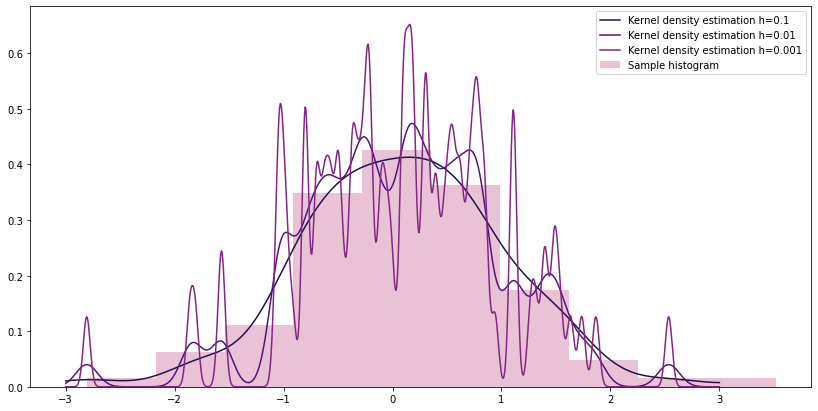

In [31]:
x = np.linspace(-3,3,1000)
X = np.random.normal(0,1,100)
plt.figure(figsize=(14,7))

for h in [0.1,0.01,0.001]:
    pdf = np.zeros(1000)
    for x_i in X:
        pdf += GaussianKernel(x-x_i,h)
    plt.plot(x,pdf/100, label = f'Kernel density estimation h={h}')
#plt.plot([-1,-0.001,0,1,1.001,2],[0,0,1,1,0,0], label='True uniform distribution')

plt.hist(X, density=True, alpha=0.3, label='Sample histogram')
plt.legend()

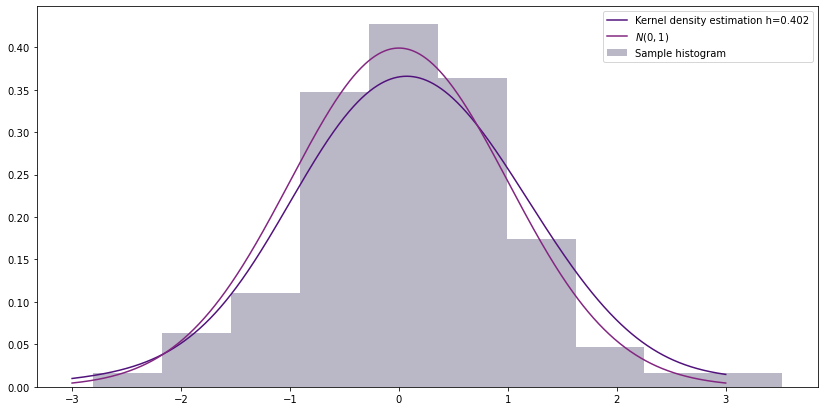

In [32]:
h_silverman = 1.06*np.std(X)*(100)**(-1/5)

plt.figure(figsize=(14,7))
plt.hist(X, density=True, alpha=0.3, label='Sample histogram')

pdf = np.zeros(1000)
for x_i in X:
    pdf += GaussianKernel(x-x_i,h_silverman)
plt.plot(x,pdf/100, label = f'Kernel density estimation h={np.round(h_silverman,3)}')
plt.plot(x,(1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2) ,label = '$N(0,1)$')

plt.legend()

In [20]:
1.06*np.std(X)*(1000)**(-1/5)

0.2622826375290939

$Ασκηση \ 2$

In [4]:
data = scipy.io.loadmat('data32.mat')

In [5]:
circles = data['circles']
stars = data['stars']

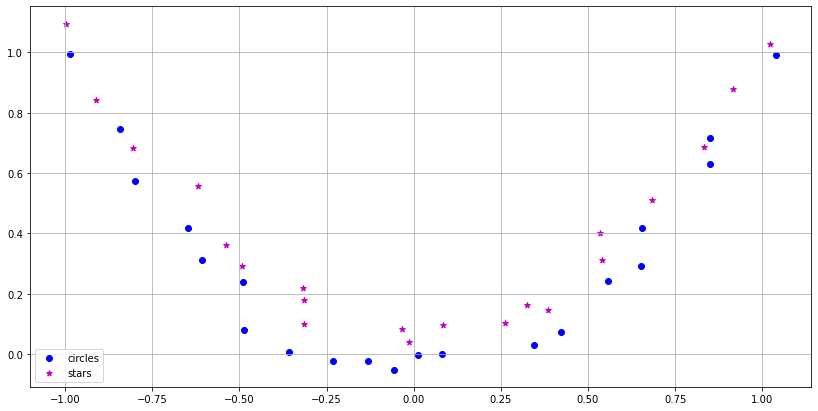

In [6]:
plt.figure(figsize=(14,7))
plt.scatter(circles[:,0],circles[:,1], color = 'b', label='circles')
plt.scatter(stars[:,0],stars[:,1], color = 'm', label='stars', marker='*')
plt.grid()
plt.legend()

In [7]:
def K(X,Y,h):
    axis = max(len(X.shape),len(Y.shape))-1
    return np.exp(-(1/h)*np.sum((X-Y)**2, axis=axis))

In [8]:
def create_K(Xi,Xj,h):
    n,k = Xi.shape[0], Xj.shape[0]
    K_ = np.zeros((n,k))
    for i in range(n):
        for j in range(k):
            K_[i,j] = K(Xi[i], Xj[j], h)
            
    return K_

In [9]:
def phi(x,X, coeff,h):
    K_ = K(X.reshape(-1,1,2),x,h)
    return K_.T@coeff

In [51]:
X = np.concatenate([stars, circles])
Y = np.concatenate([np.ones(21), -np.ones(21)])

l = 10
h = 0.1
K_ = K(X.reshape(-1,1,2),X,h)
coeff = np.linalg.inv(K_ + l*np.identity(42))@Y

In [86]:
X = np.concatenate([stars, circles])
Y = np.concatenate([np.ones(21), -np.ones(21)])

l = 1000
h = 0.01
K_ = K(X.reshape(-1,1,2),X,h)
coeff = np.linalg.inv(K_@K_ + l*np.identity(42))@K_@Y

In [87]:
coeff

array([ 6.52776921e-04,  7.26204913e-04,  1.22105606e-04,  8.40921148e-04,
        6.13399239e-04,  5.18447341e-04,  2.01930105e-03,  2.26131593e-03,
        1.20588862e-03,  1.26214666e-03,  4.31333694e-04,  9.48716698e-04,
        1.31957750e-03,  1.15642974e-03,  1.81935698e-03,  5.21576863e-04,
        1.10929748e-03,  6.41504908e-04, -5.55671170e-04,  9.36439087e-04,
        1.72783319e-04, -5.92344656e-04, -2.18301499e-04, -6.97005872e-04,
       -9.03170389e-04, -6.44735029e-04, -2.39602126e-04, -1.10786227e-03,
       -8.76384600e-04, -1.46617588e-03, -1.74328903e-03, -1.66806502e-03,
       -8.96304244e-04, -8.65774647e-04, -7.95421246e-04, -7.24804553e-04,
       -6.44513316e-04, -1.18492397e-03, -5.36128033e-04, -7.40419330e-04,
       -5.21672730e-04, -7.58051314e-05])

In [88]:
np.sum(phi(X,X, coeff,h)[:21]<0) + np.sum(phi(X,X, coeff,h)[21:]>0)

5

In [89]:
x = np.linspace(-1,1.2,100)
y = np.linspace(-0.1,1.2,100)
x,y = np.meshgrid(x,y)
points = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)

In [90]:
u = phi(points,X,coeff,h)
class1 = points[u>=0].reshape(-1,2)
class2 = points[u<0].reshape(-1,2)

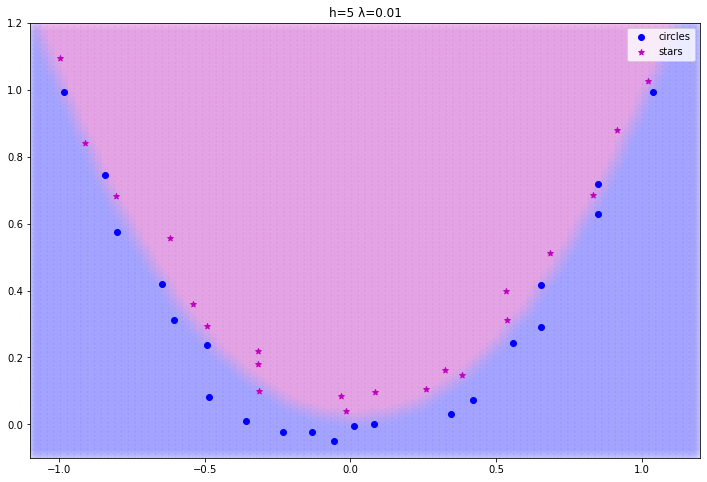

In [154]:
h=5
l=0.01
K_ = K(X.reshape(-1,1,2),X,h) #NxN matrix containing K(X_i,X_j) for each pair i,j
coeff = np.linalg.inv(K_ + l*np.identity(42))@Y

# sample 2d plane at 10000 points
x = np.linspace(-1.1,1.2,100)
y = np.linspace(-0.1,1.2,100)
x,y = np.meshgrid(x,y)
points = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)

#classify each point
u = phi(points,X,coeff,h)
class1 = points[u>=0].reshape(-1,2)
class2 = points[u<0].reshape(-1,2)

fig = plt.figure(figsize=(12, 8))

#plot zones
plt.scatter(class1[:,0],class1[:,1],facecolors='m', edgecolors='none', marker='o', alpha=0.03, s=500)
plt.scatter(class2[:,0],class2[:,1], facecolors='b', edgecolors='none', marker='o', alpha=0.03, s=500)

#plot stars and circles
plt.scatter(X[21:,0],X[21:,1], color = 'b', label='circles')
plt.scatter(X[:21,0],X[:21,1], color = 'm', label='stars', marker='*')

plt.title(f'h={h} λ={l}')
plt.xlim([-1.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.legend()

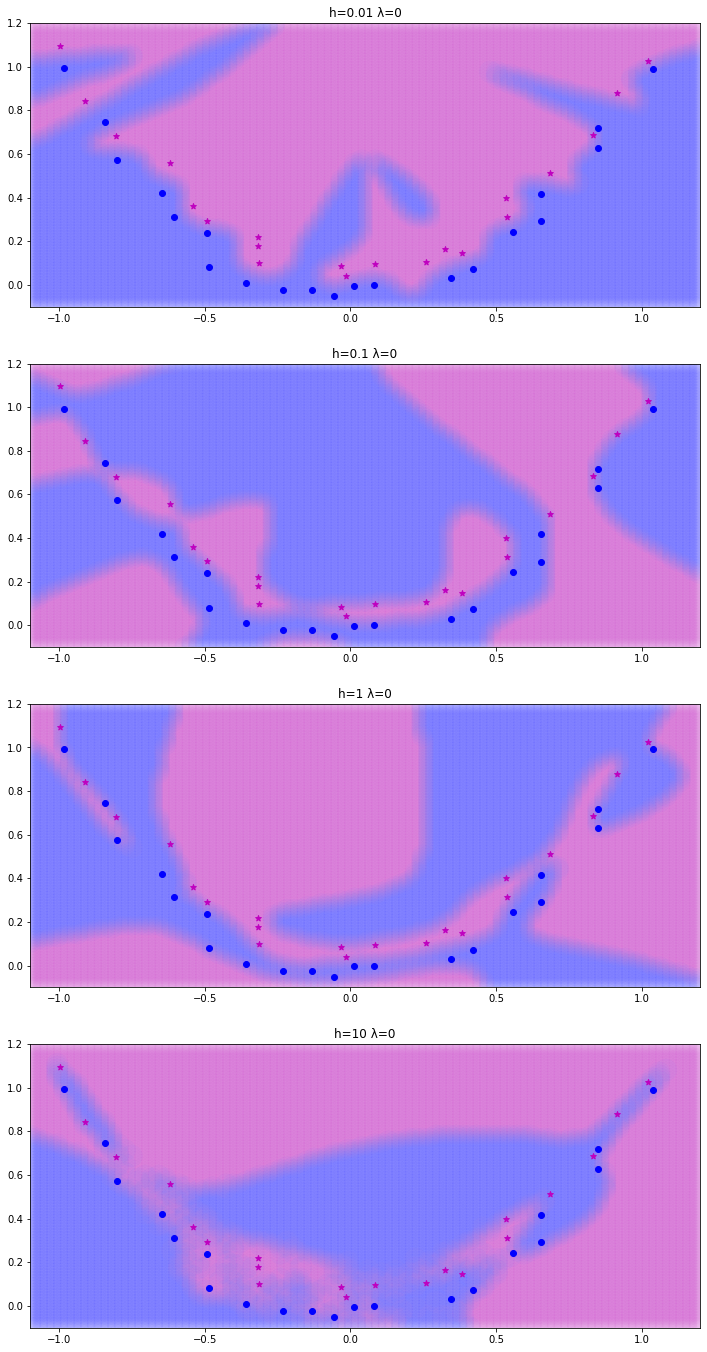

In [155]:
l = 0
h = 0.1
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))
for i,h in enumerate([0.01, 0.1, 1, 10]):
    K_ = K(X.reshape(-1,1,2),X,h)
    coeff = np.linalg.inv(K_ + l*np.identity(42))@Y

    # sample 2d plane at 10000 points
    x = np.linspace(-1.1,1.2,100)
    y = np.linspace(-0.1,1.2,100)
    x,y = np.meshgrid(x,y)
    points = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)

    #classify each point
    u = phi(points,X,coeff,h)
    class1 = points[u>=0].reshape(-1,2)
    class2 = points[u<0].reshape(-1,2)


    #plot zones
    ax[i].scatter(class1[:,0],class1[:,1],facecolors='m', edgecolors='none', marker='o', alpha=0.03, s=500)
    ax[i].scatter(class2[:,0],class2[:,1], facecolors='b', edgecolors='none', marker='o', alpha=0.03, s=500)

    #plot stars and circles
    ax[i].scatter(X[21:,0],X[21:,1], color = 'b', label='circles')
    ax[i].scatter(X[:21,0],X[:21,1], color = 'm', label='stars', marker='*')

    ax[i].set_title(f'h={h} λ={l}')
    ax[i].set_xlim([-1.1, 1.2])
    ax[i].set_ylim([-0.1, 1.2])
    #ax[i][j].legend()

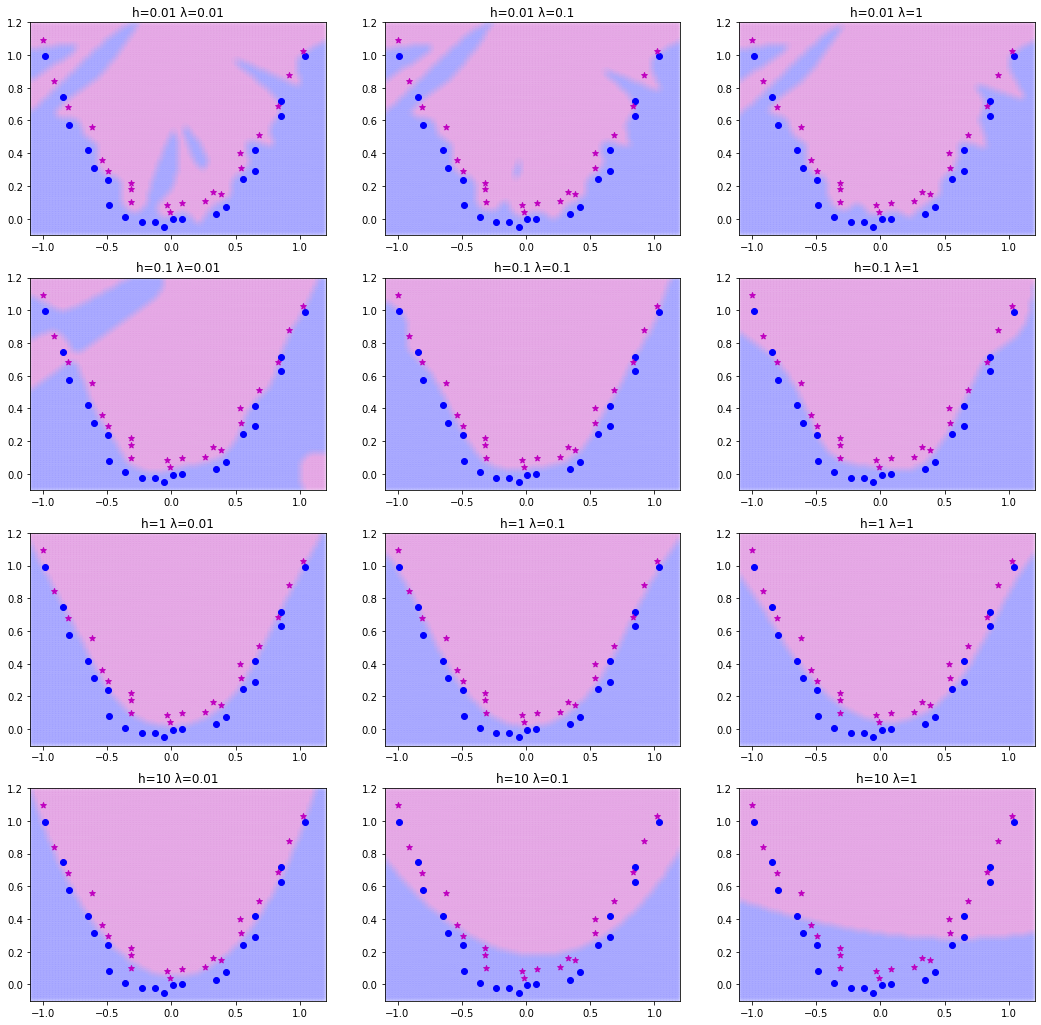

In [156]:
l = 10
h = 0.1
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))
for i,h in enumerate([0.01, 0.1, 1, 10]):
    for j,l in enumerate([0.01, 0.1, 1]):
        K_ = K(X.reshape(-1,1,2),X,h)
        coeff = np.linalg.inv(K_ + l*np.identity(42))@Y

        # sample 2d plane at 10000 points
        x = np.linspace(-1.1,1.2,100)
        y = np.linspace(-0.1,1.2,100)
        x,y = np.meshgrid(x,y)
        points = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)

        #classify each point
        u = phi(points,X,coeff,h)
        class1 = points[u>=0].reshape(-1,2)
        class2 = points[u<0].reshape(-1,2)


        #plot zones
        ax[i][j].scatter(class1[:,0],class1[:,1],facecolors='m', edgecolors='none', marker='o', alpha=0.03, s=100)
        ax[i][j].scatter(class2[:,0],class2[:,1], facecolors='b', edgecolors='none', marker='o', alpha=0.03, s=100)

        #plot stars and circles
        ax[i][j].scatter(X[21:,0],X[21:,1], color = 'b', label='circles')
        ax[i][j].scatter(X[:21,0],X[:21,1], color = 'm', label='stars', marker='*')
    
        ax[i][j].set_title(f'h={h} λ={l}')
        ax[i][j].set_xlim([-1.1, 1.2])
        ax[i][j].set_ylim([-0.1, 1.2])
        #ax[i][j].legend()

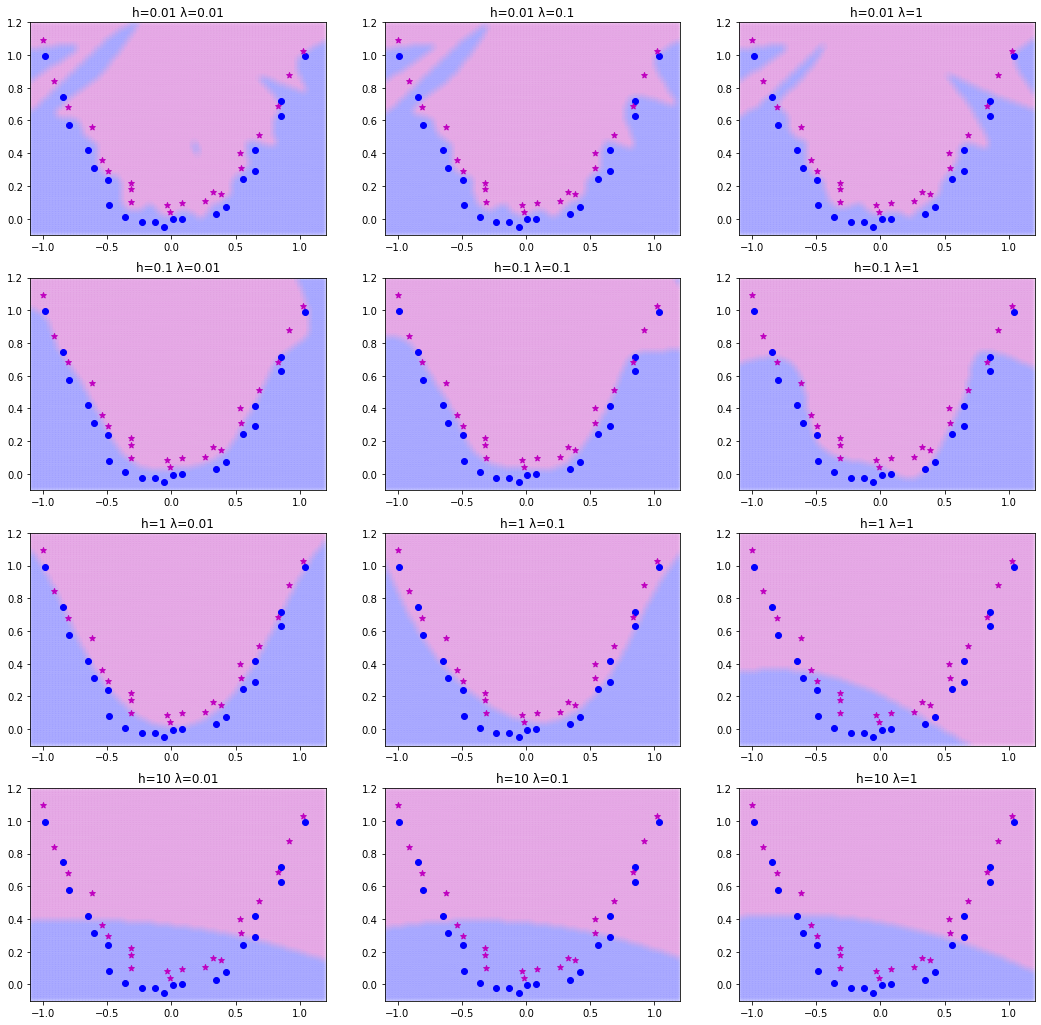

In [157]:
l = 10
h = 0.1
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))
for i,h in enumerate([0.01, 0.1, 1, 10]):
    for j,l in enumerate([0.01, 0.1, 1]):
        K_ = K(X.reshape(-1,1,2),X,h)
        coeff = np.linalg.inv(K_@K_ + l*np.identity(42))@K_@Y

        # sample 2d plane at 10000 points
        x = np.linspace(-1.1,1.2,100)
        y = np.linspace(-0.1,1.2,100)
        x,y = np.meshgrid(x,y)
        points = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)

        #classify each point
        u = phi(points,X,coeff,h)
        class1 = points[u>=0].reshape(-1,2)
        class2 = points[u<0].reshape(-1,2)


        #plot zones
        ax[i][j].scatter(class1[:,0],class1[:,1],facecolors='m', edgecolors='none', marker='o', alpha=0.03, s=100)
        ax[i][j].scatter(class2[:,0],class2[:,1], facecolors='b', edgecolors='none', marker='o', alpha=0.03, s=100)

        #plot stars and circles
        ax[i][j].scatter(X[21:,0],X[21:,1], color = 'b', label='circles')
        ax[i][j].scatter(X[:21,0],X[:21,1], color = 'm', label='stars', marker='*')
    
        ax[i][j].set_title(f'h={h} λ={l}')
        ax[i][j].set_xlim([-1.1, 1.2])
        ax[i][j].set_ylim([-0.1, 1.2])
        #ax[i][j].legend()

$Ασκηση3$

In [158]:
data = scipy.io.loadmat('data33.mat')

In [159]:
X = data['X'].T

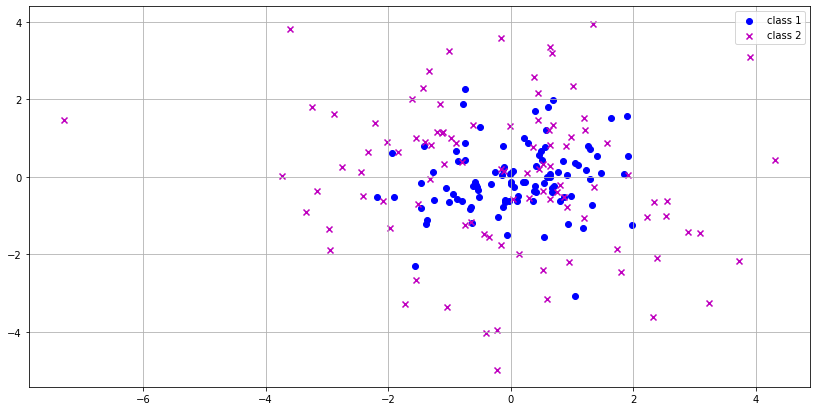

In [160]:
plt.figure(figsize=(14,7))
plt.scatter(X[:100,0],X[:100,1], color = 'b', label='class 1')
plt.scatter(X[100:,0],X[100:,1], color = 'm', label='class 2', marker='x')
plt.grid()
plt.legend()

In [257]:
def K_Means(X, K):
    prng = np.random.RandomState(1059389) #random state for reproducibility
    #prng = np.random #no random state
    featuresNo = X.shape[1] #number of features, 2 in our case
    centers = prng.rand(K,featuresNo) #initialize centers randomly
    centers = prng.normal(np.mean(X, axis=0),np.std(X, axis=0),(K,featuresNo)) #initialize centers
    variance = []
    while True:
        old_centers = np.copy(centers) #old centers array, used to test convergence
        virtual_classes = [[] for i in range(K)] #will contain patterns of each virtual class 
        
        for i in X: #for each pattern
            cls = np.argmin(np.sqrt(np.sum((centers - i)**2, axis=1))) #find its closest center, euclid distance
            virtual_classes[cls].append(i) #append to this center's class
        
        for i,cls in enumerate(virtual_classes): #for each virtual class
            if cls!=[]: #if class is not empty
                centers[i] = np.mean(cls, axis=0) #find its new center
            
        if (centers == old_centers).all(): #if new_centers are equal to old, Kmeans has converged
            break
        
        variance.append(np.sum([np.sum((i-np.mean(i, axis=0))**2) for i in virtual_classes]))
    print('total variance:', variance[-1] )
    return centers

total variance: 600.3821415895895
total variance: 447.59324536087126
total variance: 371.89229316365027
total variance: 296.33708950184655
total variance: 243.45515406064985
total variance: 212.3870179343841
total variance: 196.69177219335222
total variance: 159.832795471724
total variance: 149.6731028222422
total variance: 151.64670556866187
total variance: 136.86712950028533
total variance: 131.15636011650957
total variance: 109.47673048219592
total variance: 102.92548924352657
total variance: 96.58525457797298
total variance: 100.47145247625956
total variance: 88.50206514536262
total variance: 83.12259299845556
total variance: 69.51632651477212
total variance: 65.88894108115852
total variance: 66.76243402317759
total variance: 63.974909651956324
total variance: 54.07248755797749
total variance: 57.221282814403175
total variance: 54.81250778282476
total variance: 53.1871479319362
total variance: 51.958213835026044
total variance: 56.33260864005553
total variance: 53.01364555252109
to

No handles with labels found to put in legend.


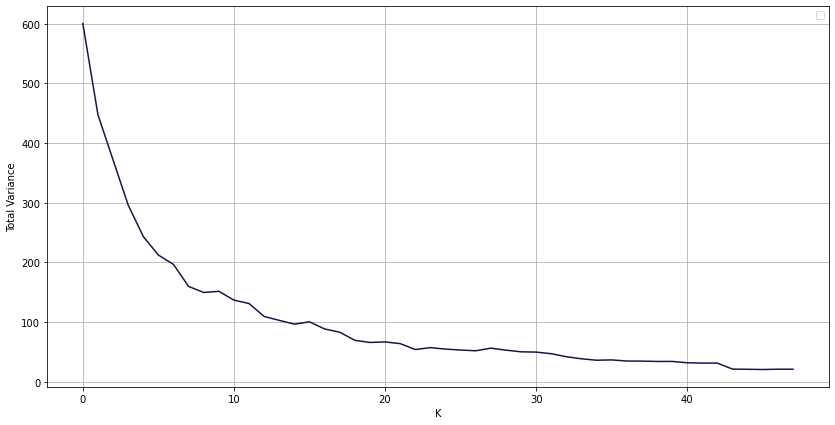

In [253]:
variances=[]
for i in range(2,50):
    centers,variance = K_Means(X,i)
    variances.append(variance)
    
plt.figure(figsize=(14,7))
plt.plot(variances)
plt.ylabel('Total Variance')
plt.xlabel('K')
plt.grid()
plt.legend()

total variance: 598.9530200948489


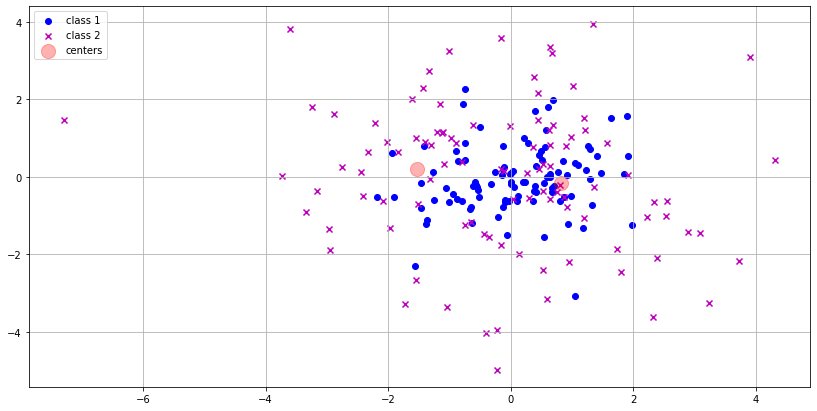

In [245]:
centers= K_Means(X,2)

plt.figure(figsize=(14,7))
plt.scatter(X[:100,0],X[:100,1], color = 'b', label='class 1')
plt.scatter(X[100:,0],X[100:,1], color = 'm', label='class 2', marker='x')
plt.scatter(centers[:,0],centers[:,1], color = 'r', label='centers', marker='o', alpha=0.3, s=200)
plt.grid()
plt.legend()

In [166]:
def splits(K):
    x = [i for i in range(K)]
    pairs = []
    subsets = [v for a in range(len(x)) for v in combinations(x, a)]

    for i in range(1,len(subsets)):
        pairs.append((list(chain(subsets[i])),[e for e in x if e not in subsets[i]]))
    
    return pairs

In [167]:
def evaluate(centers,X):
    #split data into two classes
    x1 = X[:100]
    x2 = X[100:]
    pairs = splits(len(centers)) #get all possible centers splits
    results = {} #dictionary that will contain correct_classifications : center splits pairs
    
    for i in pairs: #for each possible split
        #split centers accordingly
        centers1 = centers[i[0]] 
        centers2 = centers[i[1]]
  
        correct = 0#total correct classifications
        
        for j in x1: #classify each class 1 sample by finding class of closest center
            class1dist = min(np.sqrt(np.sum((j-centers1)**2,axis=1)))
            class2dist = min(np.sqrt(np.sum((j-centers2)**2,axis=1)))
            
            if class1dist < class2dist: #if classification is correct, increment correct by 1
                correct+=1
            else:
                None
            
        
        for j in x2: #simillarly for class2
            class1dist = min(np.sqrt(np.sum((j-centers1)**2,axis=1)))
            class2dist = min(np.sqrt(np.sum((j-centers2)**2,axis=1)))

            if class1dist > class2dist:
                correct+=1
            else:
                None
                
        results.update({correct:i}) #add result to dictionary
    optimal_centers = results[max(results)] #get centers split with the most correct classifications
    print('classification error:',np.round(1 - max(results)/200, 4))
    return optimal_centers[0], optimal_centers[1]

total variance: 294.8949307708402
classification error: 0.32


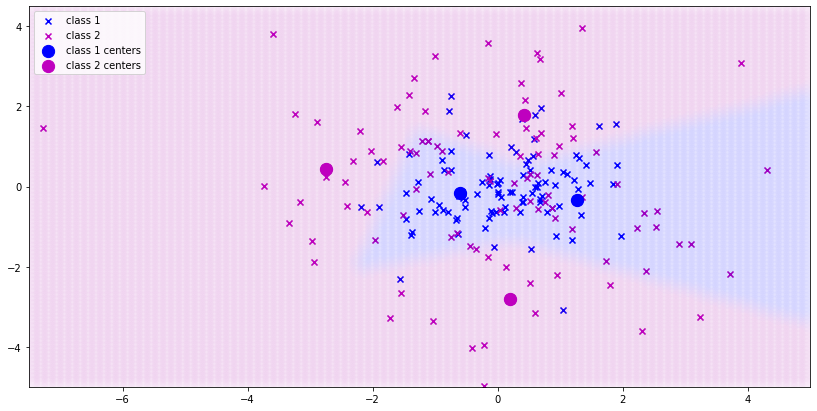

In [246]:
centers = K_Means(X,5)

centers1_indexes, centers2_indexes = evaluate(centers,X)
centers1 = centers[centers1_indexes]
centers2 = centers[centers2_indexes]


plt.figure(figsize=(14,7))
plt.scatter(X[:100,0],X[:100,1], color = 'b', label='class 1', marker='x')
plt.scatter(X[100:,0],X[100:,1], color = 'm', label='class 2', marker='x')
plt.scatter(centers1[:,0],centers1[:,1], color = 'b', label='class 1 centers', s=150)
plt.scatter(centers2[:,0],centers2[:,1], color = 'm', label='class 2 centers', s=150)

#Cluster borders
x = np.linspace(-7.5,5,100)
y = np.linspace(-5,4.5,100)
x,y = np.meshgrid(x,y)

points = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)

class1 = []
class2 = []
for i in points:
    class1dist = min(np.sqrt(np.sum((i-centers1)**2,axis=1)))
    class2dist = min(np.sqrt(np.sum((i-centers2)**2,axis=1)))
    if class1dist < class2dist:
        class1.append(i)
    else:
        class2.append(i)

class1 = np.array(class1)
class2 = np.array(class2)

plt.scatter(class1[:,0],class1[:,1],facecolors='b', edgecolors='none', marker='o', alpha=0.01, s=500)
plt.scatter(class2[:,0],class2[:,1], facecolors='m', edgecolors='none', marker='o', alpha=0.01, s=500)
plt.xlim([-7.5, 5])
plt.ylim([-5, 4.5])
################
#plt.grid()
plt.legend()

In [255]:
X_3 = np.sum(X**2, axis=1).reshape(-1,1)
X_n = np.concatenate([X,X_3], axis=1)

In [258]:
centers = K_Means(X_n,2)
centers1, centers2 = evaluate(centers,X_n)

total variance: 3905.9815929036276
classification error: 0.35


In [286]:
%matplotlib inline

In [285]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_n[:100,0], X_n[:100,1], X_n[:100,2], color = 'b', label='class 1', marker='x')
ax.scatter(X_n[100:,0], X_n[100:,1], X_n[100:,2], color = 'm', label='class 2', marker='x')

ax.scatter(centers1[:,0],centers1[:,1], centers1[:,2], color = 'b', label='class 1 centers', s=150)
ax.scatter(centers2[:,0],centers2[:,1], centers1[:,2], color = 'm', label='class 2 centers', s=150)

plt.legend()
plt.show()

In [173]:
for i in range(50):
    centers = K_Means(X_n,2)
    centers1, centers2 = evaluate(centers,X_n)

total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 8684.461014771623
classification error: 0.5
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total variance: 3905.9815929036276
classification error: 0.35
total vari

In [174]:
for i in range(50):
    centers = K_Means(X,2)
    centers1, centers2 = evaluate(centers,X)

total variance: 600.3821415895895
classification error: 0.435
total variance: 600.048850294058
classification error: 0.385
total variance: 600.3821415895895
classification error: 0.435
total variance: 600.3821415895895
classification error: 0.435
total variance: 603.5737611670256
classification error: 0.435
total variance: 612.8514959057227
classification error: 0.39
total variance: 612.8514959057227
classification error: 0.39
total variance: 603.5737611670256
classification error: 0.435
total variance: 603.5737611670256
classification error: 0.435
total variance: 603.5737611670256
classification error: 0.435
total variance: 600.048850294058
classification error: 0.385
total variance: 600.0977416950159
classification error: 0.38
total variance: 600.048850294058
classification error: 0.385
total variance: 598.9530200948489
classification error: 0.45
total variance: 603.5737611670256
classification error: 0.435
total variance: 600.3821415895895
classification error: 0.435
total variance: